In [1]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 660.6 kB/s eta 0:00:03
   - -------------------------------------- 0.1/1.4 MB 469.7 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.4 MB 585.1 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.4 MB 821.4 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 845.5 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 734.2 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 754.9 kB/s eta 0:00:02
   ------- -------------------------------- 0.3

# Q1

In [3]:
import pandas as pd 
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [5]:
df = pd.read_csv(r"C:\Users\acer\Desktop\excelr\assignments\9 Association Rule\book.csv")
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [7]:
df.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [8]:
df.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
one_hot_encoded = pd.get_dummies(df)

# support and confidence values
support_values = [0.01, 0.03]
confidence_values = [0.5, 0.7]

for support in support_values:
    for confidence in confidence_values:
    
        frequent_itemsets = apriori(one_hot_encoded, min_support=support, use_colnames=True)
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)

    
        print(f"Support: {support}, Confidence: {confidence}")
        print(f"Number of Rules: {len(rules)}")
        print(rules)
        print('***************************')

C:\Users\acer\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Support: 0.01, Confidence: 0.5
Number of Rules: 3272
                      antecedents  \
0                      (YouthBks)   
1                      (ChildBks)   
2                       (CookBks)   
3                      (DoItYBks)   
4                        (RefBks)   
...                           ...   
3267   (ItalArt, CookBks, RefBks)   
3268  (ItalCook, ItalArt, RefBks)   
3269          (ItalAtlas, ArtBks)   
3270         (ItalAtlas, ItalArt)   
3271            (ItalArt, RefBks)   

                                           consequents  antecedent support  \
0                                           (ChildBks)              0.2475   
1                                            (CookBks)              0.4230   
2                                           (ChildBks)              0.4310   
3                                           (ChildBks)              0.2820   
4                                           (ChildBks)              0.2145   
...                               

C:\Users\acer\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Support: 0.01, Confidence: 0.7
Number of Rules: 1459
                         antecedents                            consequents  \
0                           (RefBks)                             (ChildBks)   
1                          (GeogBks)                             (ChildBks)   
2                         (ItalCook)                             (ChildBks)   
3                        (ItalAtlas)                             (ChildBks)   
4                          (ItalArt)                             (ChildBks)   
...                              ...                                    ...   
1454  (ItalAtlas, ChildBks, ItalArt)    (ArtBks, ItalCook, CookBks, RefBks)   
1455    (ItalAtlas, ArtBks, CookBks)  (ChildBks, ItalCook, ItalArt, RefBks)   
1456   (ItalAtlas, ArtBks, ItalCook)   (ItalArt, ChildBks, CookBks, RefBks)   
1457   (ItalAtlas, CookBks, ItalArt)   (ArtBks, ChildBks, ItalCook, RefBks)   
1458  (ItalAtlas, ItalCook, ItalArt)    (ArtBks, ChildBks, CookBks, RefBks)   

C:\Users\acer\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [11]:
one_hot_encoded = pd.get_dummies(df)

min_support = 0.04
min_length_values = [2, 3, 4] 

for min_length in min_length_values:
    frequent_itemsets = apriori(one_hot_encoded, min_support=min_support, use_colnames=True)
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    frequent_itemsets = frequent_itemsets[frequent_itemsets['length'] >= min_length]
    
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9,support_only=True)
    
    print(f"Association Rules with Minimum Length {min_length}:")
    print(rules)
    print("3" * 10)

C:\Users\acer\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Association Rules with Minimum Length 2:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []
3333333333
Association Rules with Minimum Length 3:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []
3333333333
Association Rules with Minimum Length 4:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []
3333333333


C:\Users\acer\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


C:\Users\acer\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                       antecedents           consequents  antecedent support  \
0                       (YouthBks)            (ChildBks)              0.2475   
1                       (ChildBks)             (CookBks)              0.4230   
2                        (CookBks)            (ChildBks)              0.4310   
3                       (DoItYBks)            (ChildBks)              0.2820   
4                         (RefBks)            (ChildBks)              0.2145   
..                             ...                   ...                 ...   
255  (ChildBks, DoItYBks, GeogBks)     (ArtBks, CookBks)              0.1045   
256   (ArtBks, ChildBks, DoItYBks)    (GeogBks, CookBks)              0.0950   
257    (ArtBks, GeogBks, DoItYBks)   (ChildBks, CookBks)              0.0730   
258     (ArtBks, GeogBks, CookBks)  (ChildBks, DoItYBks)              0.1035   
259    (ArtBks, DoItYBks, CookBks)   (ChildBks, GeogBks)              0.1015   

     consequent support  support  confi

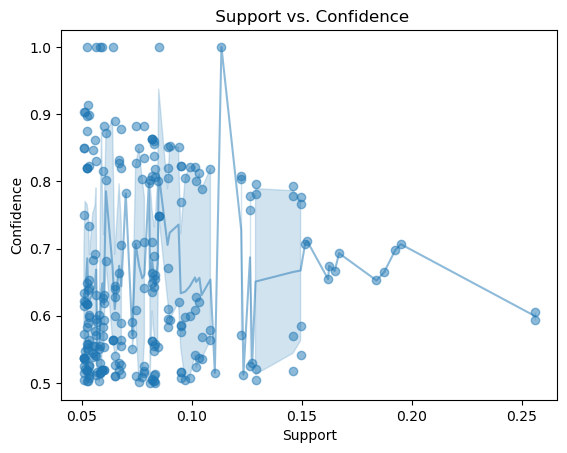

In [12]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

one_hot_encoded = pd.get_dummies(df)

frequent_itemsets = apriori(one_hot_encoded, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
print(rules)

# Scatter plot of support vs. confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.title(' Support vs. Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')

sns.lineplot(x='support', y='confidence', data=rules, alpha=0.5)
plt.title(' Support vs. Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

C:\Users\acer\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.04, Confidence=0.4, Min_len=4:
                                  antecedents consequents  antecedent support  \
443  (CookBks, ChildBks, DoItYBks, YouthBks)    (RefBks)              0.0820   
444   (ChildBks, DoItYBks, RefBks, YouthBks)   (CookBks)              0.0530   
445    (CookBks, ChildBks, DoItYBks, RefBks)  (YouthBks)              0.0745   
446    (ChildBks, CookBks, RefBks, YouthBks)  (DoItYBks)              0.0680   
447    (DoItYBks, CookBks, RefBks, YouthBks)  (ChildBks)              0.0485   
457   (ArtBks, ChildBks, DoItYBks, YouthBks)   (CookBks)              0.0510   
458    (CookBks, ArtBks, ChildBks, DoItYBks)  (YouthBks)              0.0820   
459    (ArtBks, ChildBks, CookBks, YouthBks)  (DoItYBks)              0.0670   
460  (CookBks, ChildBks, DoItYBks, YouthBks)    (ArtBks)              0.0820   
461    (ArtBks, DoItYBks, CookBks, YouthBks)  (ChildBks)              0.0525   
470  (ChildBks, DoItYBks, GeogBks, YouthBks)   (CookBks)            

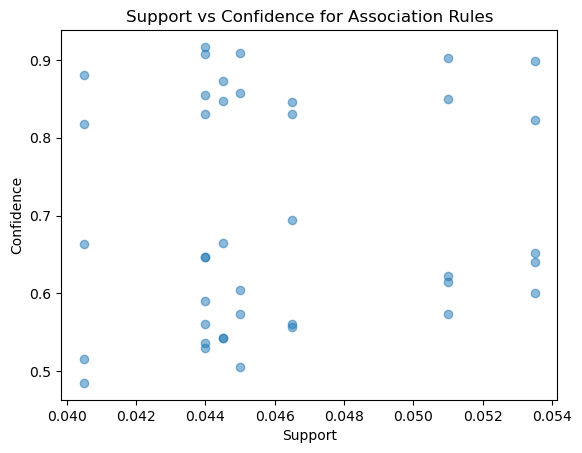

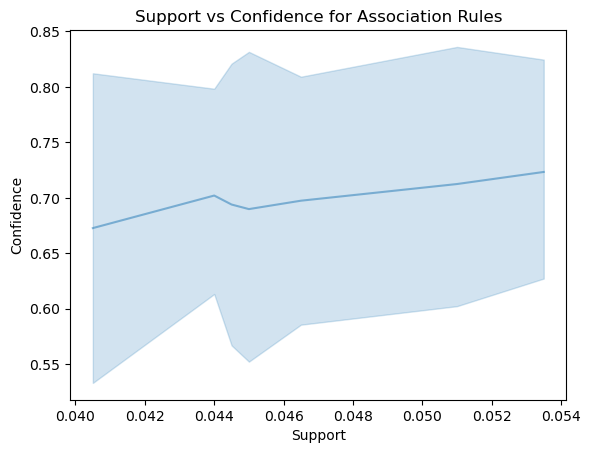

C:\Users\acer\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.02, Confidence=0.5, Min_len=3:
                                        antecedents           consequents  \
244                  (DoItYBks, ChildBks, CookBks)            (YouthBks)   
245                 (DoItYBks, ChildBks, YouthBks)             (CookBks)   
246                  (DoItYBks, CookBks, YouthBks)            (ChildBks)   
247                  (ChildBks, CookBks, YouthBks)            (DoItYBks)   
250                    (ChildBks, CookBks, RefBks)            (YouthBks)   
...                                            ...                   ...   
999   (GeogBks, ArtBks, DoItYBks, CookBks, RefBks)            (ChildBks)   
1000          (ArtBks, ChildBks, DoItYBks, RefBks)    (GeogBks, CookBks)   
1001           (ArtBks, GeogBks, DoItYBks, RefBks)   (ChildBks, CookBks)   
1002            (ArtBks, GeogBks, CookBks, RefBks)  (ChildBks, DoItYBks)   
1003           (ArtBks, DoItYBks, CookBks, RefBks)   (ChildBks, GeogBks)   

      antecedent support  consequen

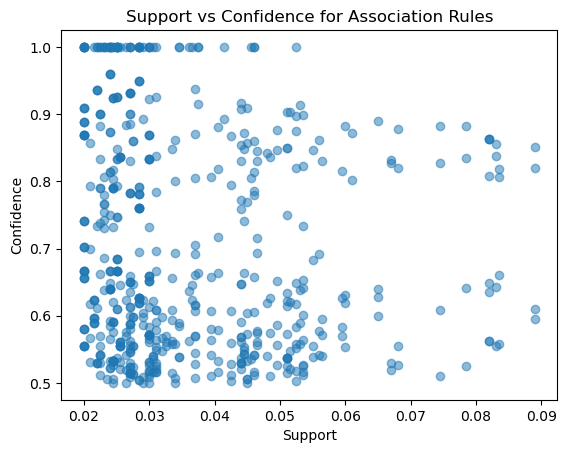

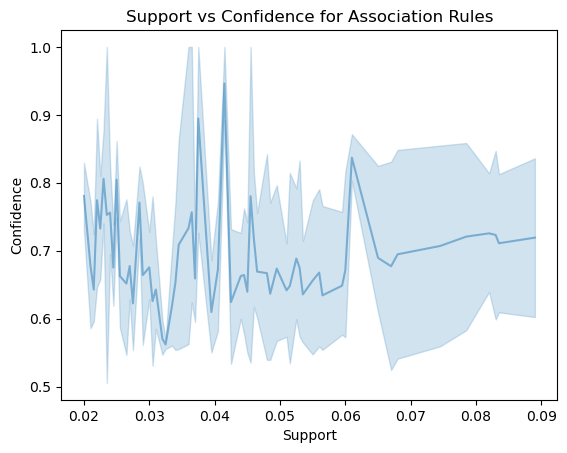

C:\Users\acer\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.03, Confidence=0.6, Min_len=5:
                                           antecedents consequents  \
293   (ChildBks, GeogBks, ArtBks, DoItYBks, YouthBks)   (CookBks)   
294    (ChildBks, GeogBks, ArtBks, YouthBks, CookBks)  (DoItYBks)   
295  (ChildBks, GeogBks, DoItYBks, YouthBks, CookBks)    (ArtBks)   
296   (ChildBks, ArtBks, DoItYBks, YouthBks, CookBks)   (GeogBks)   
297    (GeogBks, ArtBks, DoItYBks, YouthBks, CookBks)  (ChildBks)   

     antecedent support  consequent support  support  confidence      lift  \
293              0.0335               0.431    0.031    0.925373  2.147037   
294              0.0465               0.282    0.031    0.666667  2.364066   
295              0.0510               0.241    0.031    0.607843  2.522171   
296              0.0445               0.276    0.031    0.696629  2.524019   
297              0.0370               0.423    0.031    0.837838  1.980704   

     leverage  conviction  zhangs_metric  
293  0.016561    7.62

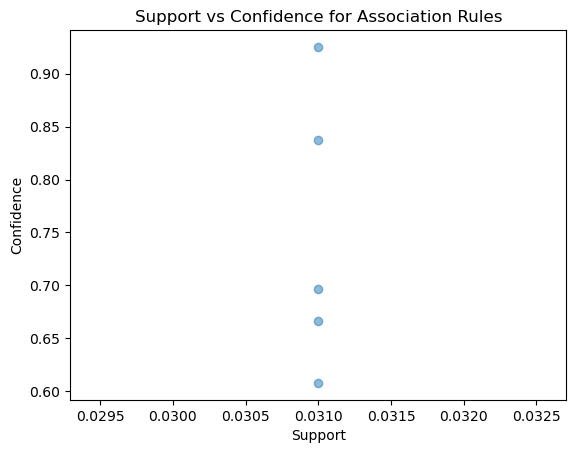

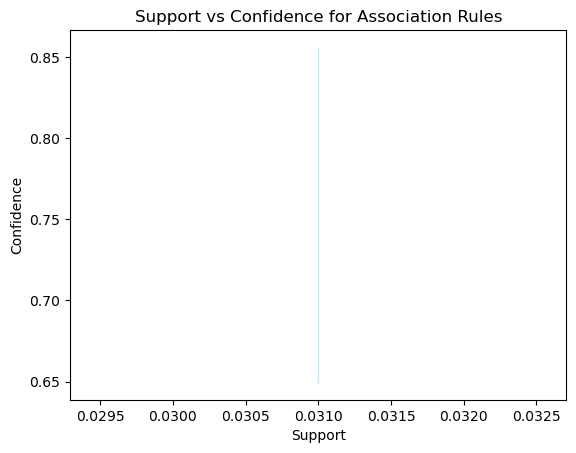

C:\Users\acer\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.03, Confidence=0.5, Min_len=3:
                                 antecedents                   consequents  \
183           (DoItYBks, ChildBks, CookBks)                    (YouthBks)   
184          (DoItYBks, ChildBks, YouthBks)                     (CookBks)   
185           (DoItYBks, CookBks, YouthBks)                    (ChildBks)   
186           (ChildBks, CookBks, YouthBks)                    (DoItYBks)   
189             (ChildBks, CookBks, RefBks)                    (YouthBks)   
..                                      ...                           ...   
553   (ArtBks, GeogBks, DoItYBks, YouthBks)           (ChildBks, CookBks)   
554    (ArtBks, GeogBks, CookBks, YouthBks)          (ChildBks, DoItYBks)   
555  (CookBks, GeogBks, DoItYBks, YouthBks)            (ArtBks, ChildBks)   
556   (ArtBks, DoItYBks, CookBks, YouthBks)           (ChildBks, GeogBks)   
557            (ArtBks, DoItYBks, YouthBks)  (ChildBks, CookBks, GeogBks)   

     antecedent support

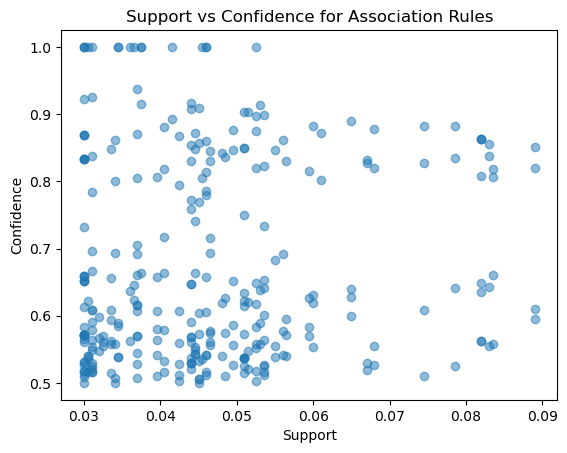

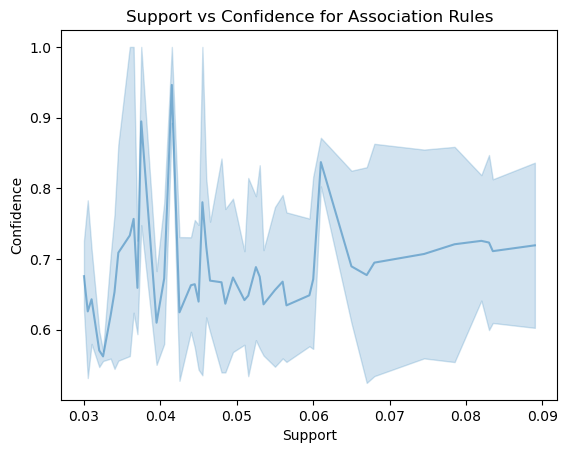

C:\Users\acer\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.02, Confidence=0.6, Min_len=4:
                                        antecedents          consequents  \
396         (ChildBks, DoItYBks, RefBks, YouthBks)            (CookBks)   
397          (ChildBks, CookBks, RefBks, YouthBks)           (DoItYBks)   
398          (DoItYBks, CookBks, RefBks, YouthBks)           (ChildBks)   
400         (ArtBks, ChildBks, DoItYBks, YouthBks)            (CookBks)   
401          (ArtBks, ChildBks, CookBks, YouthBks)           (DoItYBks)   
..                                             ...                  ...   
591            (ArtBks, GeogBks, RefBks, YouthBks)  (ChildBks, CookBks)   
592  (ChildBks, GeogBks, ArtBks, DoItYBks, RefBks)            (CookBks)   
593  (ChildBks, ArtBks, DoItYBks, CookBks, RefBks)            (GeogBks)   
594   (GeogBks, ArtBks, DoItYBks, CookBks, RefBks)           (ChildBks)   
595            (ArtBks, GeogBks, DoItYBks, RefBks)  (ChildBks, CookBks)   

     antecedent support  consequent support  su

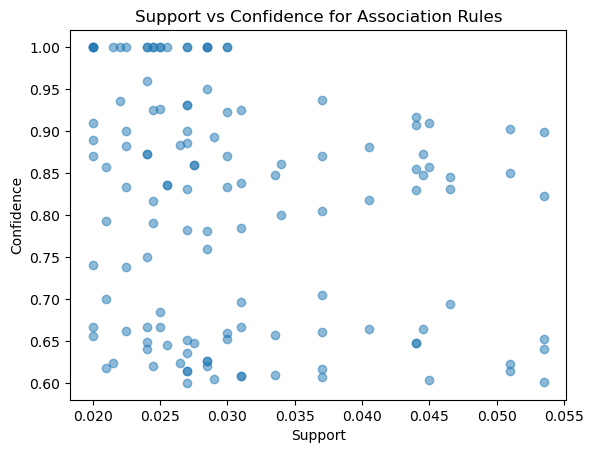

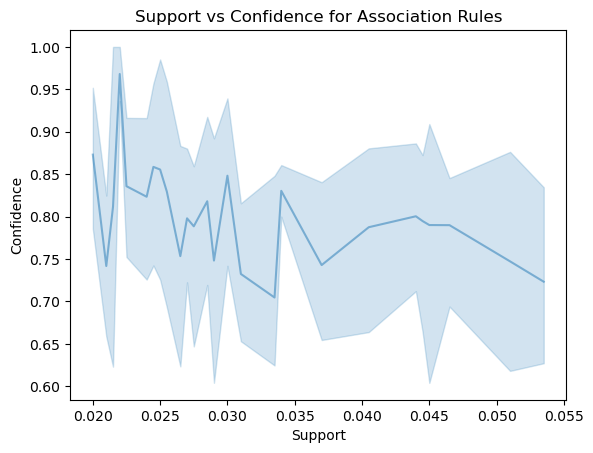

In [13]:
one_hot_encoded = pd.get_dummies(df)

def generate_and_visualize_rules(support, confidence, min_len):
    frequent_itemsets = apriori(one_hot_encoded, min_support=support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)

    rules = rules[rules['antecedents'].apply(lambda x: len(x)) >= min_len]

    print(f"Rules for Support={support}, Confidence={confidence}, Min_len={min_len}:\n", rules)

    plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Support vs Confidence for Association Rules')
    plt.show()
    sns.lineplot(x='support', y='confidence', data=rules, alpha=0.5)
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Support vs Confidence for Association Rules')
    plt.show()
    
# different values of support,confidence,minimum length
generate_and_visualize_rules(support=0.04, confidence=0.4, min_len=4)
generate_and_visualize_rules(support=0.02, confidence=0.5, min_len=3)
generate_and_visualize_rules(support=0.03, confidence=0.6, min_len=5)

# minimum length in apriori algorithm
generate_and_visualize_rules(support=0.03, confidence=0.5, min_len=3)
generate_and_visualize_rules(support=0.02, confidence=0.6, min_len=4)

C:\Users\acer\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


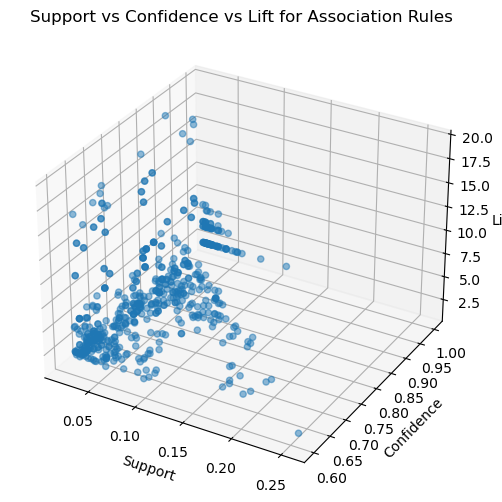

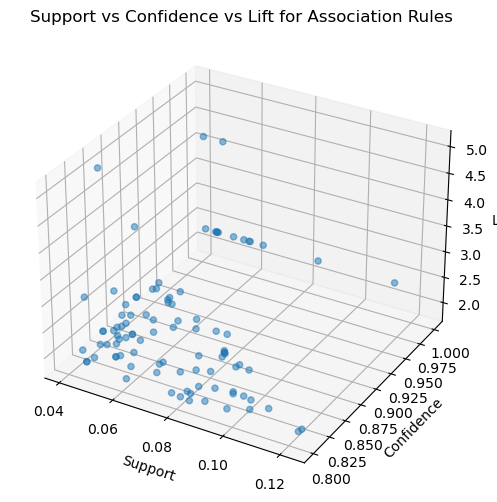

In [14]:
from mpl_toolkits.mplot3d import Axes3D
one_hot_encoded = pd.get_dummies(df)

def generate_and_visualize_rules_3d(support, confidence):
   
    frequent_itemsets = apriori(one_hot_encoded, min_support=support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)

    # 3D scatter plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(rules['support'], rules['confidence'], rules['lift'], alpha=0.5)
    ax.set_xlabel('Support')
    ax.set_ylabel('Confidence')
    ax.set_zlabel('Lift')
    ax.set_title('Support vs Confidence vs Lift for Association Rules')
    
generate_and_visualize_rules_3d(support=0.02, confidence=0.6)
generate_and_visualize_rules_3d(support=0.04, confidence=0.8)

# Q2

In [16]:
df1 = pd.read_csv(r"C:\Users\acer\Desktop\excelr\assignments\9 Association Rule\my_movies.csv")
df1.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'Sixth Sense', 'Gladiator', 'LOTR1',
       'Harry Potter1', 'Patriot', 'LOTR2', 'Harry Potter2', 'LOTR',
       'Braveheart', 'Green Mile'],
      dtype='object')

In [17]:
df1.info

<bound method DataFrame.info of               V1             V2             V3          V4     V5  \
0    Sixth Sense          LOTR1  Harry Potter1  Green Mile  LOTR2   
1      Gladiator        Patriot     Braveheart         NaN    NaN   
2          LOTR1          LOTR2            NaN         NaN    NaN   
3      Gladiator        Patriot    Sixth Sense         NaN    NaN   
4      Gladiator        Patriot    Sixth Sense         NaN    NaN   
5      Gladiator        Patriot    Sixth Sense         NaN    NaN   
6  Harry Potter1  Harry Potter2            NaN         NaN    NaN   
7      Gladiator        Patriot            NaN         NaN    NaN   
8      Gladiator        Patriot    Sixth Sense         NaN    NaN   
9    Sixth Sense           LOTR      Gladiator  Green Mile    NaN   

   Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2      

In [18]:
df1.isnull().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [19]:
df1.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\acer\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.01, Confidence=0.4, Min_len=3:
                                   antecedents  \
1351   (Sixth Sense, V1_Gladiator, Gladiator)   
1352     (Sixth Sense, V1_Gladiator, Patriot)   
1353        (Sixth Sense, Patriot, Gladiator)   
1354       (Patriot, V1_Gladiator, Gladiator)   
1365       (Sixth Sense, Patriot, V2_Patriot)   
...                                       ...   
63179        (Harry Potter1, V2_LOTR1, LOTR1)   
63180  (Harry Potter1, V1_Sixth Sense, LOTR2)   
63181          (V1_Sixth Sense, LOTR1, LOTR2)   
63182  (Harry Potter1, V1_Sixth Sense, LOTR1)   
63183           (Harry Potter1, LOTR1, LOTR2)   

                                             consequents  antecedent support  \
1351                                           (Patriot)                 0.4   
1352                                         (Gladiator)                 0.4   
1353                                      (V1_Gladiator)                 0.4   
1354                                   

C:\Users\acer\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.02, Confidence=0.5, Min_len=4:
                                              antecedents  \
5449       (Sixth Sense, Patriot, V2_Patriot, Gladiator)   
5450   (Sixth Sense, V1_Gladiator, V2_Patriot, Gladia...   
5451     (Sixth Sense, Patriot, V1_Gladiator, Gladiator)   
5452    (V1_Gladiator, Sixth Sense, Patriot, V2_Patriot)   
5453      (V1_Gladiator, Patriot, V2_Patriot, Gladiator)   
...                                                  ...   
63059   (Harry Potter1, V1_Sixth Sense, V2_LOTR1, LOTR2)   
63060           (V1_Sixth Sense, V2_LOTR1, LOTR1, LOTR2)   
63061   (Harry Potter1, V1_Sixth Sense, V2_LOTR1, LOTR1)   
63062            (Harry Potter1, V2_LOTR1, LOTR1, LOTR2)   
63063      (Harry Potter1, V1_Sixth Sense, LOTR1, LOTR2)   

                                             consequents  antecedent support  \
5449                                      (V1_Gladiator)                 0.4   
5450                                           (Patriot)           

C:\Users\acer\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.03, Confidence=0.6, Min_len=5:
                                              antecedents  \
11923  (Sixth Sense, V3_Sixth Sense, Gladiator, V2_Pa...   
11924  (Sixth Sense, V3_Sixth Sense, Gladiator, V2_Pa...   
11925  (Sixth Sense, V3_Sixth Sense, Gladiator, Patri...   
11926  (Sixth Sense, V3_Sixth Sense, V2_Patriot, V1_G...   
11927  (Sixth Sense, Gladiator, V2_Patriot, V1_Gladia...   
...                                                  ...   
56590  (Green Mile, V2_LOTR1, V1_Sixth Sense, LOTR2, ...   
56591  (Green Mile, V2_LOTR1, V1_Sixth Sense, Harry P...   
56592  (Green Mile, V2_LOTR1, LOTR2, Harry Potter1, L...   
56593  (Green Mile, V1_Sixth Sense, LOTR2, Harry Pott...   
56594  (V2_LOTR1, V1_Sixth Sense, LOTR2, Harry Potter...   

                                             consequents  antecedent support  \
11923                                     (V1_Gladiator)                 0.4   
11924                                          (Patriot)           

C:\Users\acer\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.03, Confidence=0.5, Min_len=3:
                                   antecedents  \
1351   (Sixth Sense, V1_Gladiator, Gladiator)   
1352     (Sixth Sense, V1_Gladiator, Patriot)   
1353        (Sixth Sense, Patriot, Gladiator)   
1354       (Patriot, V1_Gladiator, Gladiator)   
1365       (Sixth Sense, Patriot, V2_Patriot)   
...                                       ...   
63179        (Harry Potter1, V2_LOTR1, LOTR1)   
63180  (Harry Potter1, V1_Sixth Sense, LOTR2)   
63181          (V1_Sixth Sense, LOTR1, LOTR2)   
63182  (Harry Potter1, V1_Sixth Sense, LOTR1)   
63183           (Harry Potter1, LOTR1, LOTR2)   

                                             consequents  antecedent support  \
1351                                           (Patriot)                 0.4   
1352                                         (Gladiator)                 0.4   
1353                                      (V1_Gladiator)                 0.4   
1354                                   

C:\Users\acer\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.02, Confidence=0.6, Min_len=4:
                                              antecedents  \
4109       (Sixth Sense, Patriot, V2_Patriot, Gladiator)   
4110   (Sixth Sense, V1_Gladiator, V2_Patriot, Gladia...   
4111     (Sixth Sense, Patriot, V1_Gladiator, Gladiator)   
4112    (V1_Gladiator, Sixth Sense, Patriot, V2_Patriot)   
4113      (V1_Gladiator, Patriot, V2_Patriot, Gladiator)   
...                                                  ...   
56799   (Harry Potter1, V1_Sixth Sense, V2_LOTR1, LOTR2)   
56800           (V1_Sixth Sense, V2_LOTR1, LOTR1, LOTR2)   
56801   (Harry Potter1, V1_Sixth Sense, V2_LOTR1, LOTR1)   
56802            (Harry Potter1, V2_LOTR1, LOTR1, LOTR2)   
56803      (Harry Potter1, V1_Sixth Sense, LOTR1, LOTR2)   

                                             consequents  antecedent support  \
4109                                      (V1_Gladiator)                 0.4   
4110                                           (Patriot)           

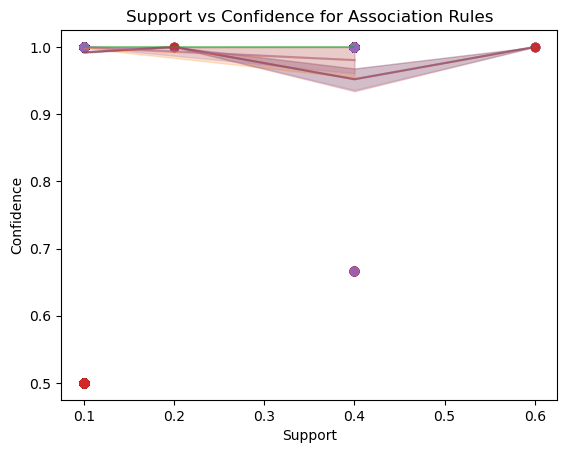

In [20]:
one_hot_encoded = pd.get_dummies(df1)

def generate_and_visualize_rules(support, confidence, min_len):
    frequent_itemsets = apriori(one_hot_encoded, min_support=support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)

    rules = rules[rules['antecedents'].apply(lambda x: len(x)) >= min_len]

    print(f"Rules for Support={support}, Confidence={confidence}, Min_len={min_len}:\n", rules)

    plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Support vs Confidence for Association Rules')
    
    sns.lineplot(x='support', y='confidence', data=rules, alpha=0.5)
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Support vs Confidence for Association Rules')
    
# different values of support,confidence,minimum length
generate_and_visualize_rules(support=0.01, confidence=0.4, min_len=3)
generate_and_visualize_rules(support=0.02, confidence=0.5, min_len=4)
generate_and_visualize_rules(support=0.03, confidence=0.6, min_len=5)

# minimum length in apriori algorithm
generate_and_visualize_rules(support=0.03, confidence=0.5, min_len=3)
generate_and_visualize_rules(support=0.02, confidence=0.6, min_len=4)

C:\Users\acer\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


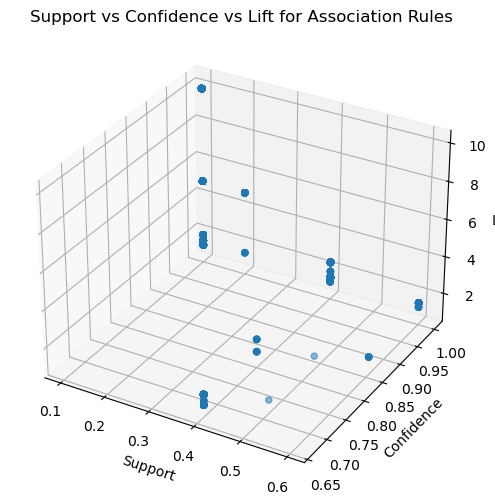

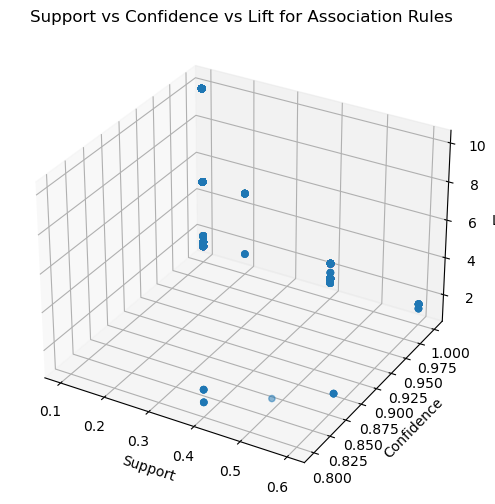

In [21]:
from mpl_toolkits.mplot3d import Axes3D
one_hot_encoded = pd.get_dummies(df1)


def generate_and_visualize_rules_3d(support, confidence):
   
    frequent_itemsets = apriori(one_hot_encoded, min_support=support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)

    # 3D scatter plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(rules['support'], rules['confidence'], rules['lift'], alpha=0.5)
    ax.set_xlabel('Support')
    ax.set_ylabel('Confidence')
    ax.set_zlabel('Lift')
    ax.set_title('Support vs Confidence vs Lift for Association Rules')
    
generate_and_visualize_rules_3d(support=0.02, confidence=0.6)
generate_and_visualize_rules_3d(support=0.03, confidence=0.8)